In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv("data/car_data.csv")
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
181,Hero Splender Plus,2016,0.30,0.480,50000,Petrol,Individual,Manual,0
209,grand i10,2015,4.85,5.700,21125,Diesel,Dealer,Manual,0
214,grand i10,2017,5.25,5.700,20114,Petrol,Dealer,Manual,0
150,TVS Apache RTR 180,2011,0.50,0.826,6000,Petrol,Individual,Manual,0
294,amaze,2014,3.75,6.800,33019,Petrol,Dealer,Manual,0
169,Hero Splender iSmart,2015,0.40,0.540,14000,Petrol,Individual,Manual,0
295,city,2015,8.55,13.090,60076,Diesel,Dealer,Manual,0
76,corolla altis,2013,5.50,14.680,72000,Petrol,Dealer,Manual,0
225,i10,2011,2.70,4.600,22517,Petrol,Dealer,Manual,0
39,sx4,2003,2.25,7.980,62000,Petrol,Dealer,Manual,0


In [163]:
df.shape

(301, 9)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [165]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [166]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


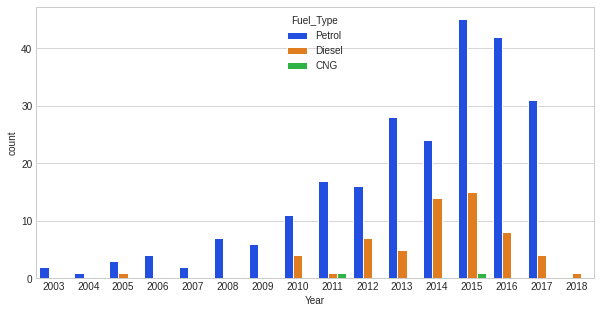

In [167]:
plt.style.use('seaborn-whitegrid')
sns.set_palette('bright') 
plt.figure(figsize=(10,5))
sns.countplot(x="Year", hue= 'Fuel_Type', edgecolor="1", data=df)
plt.show()

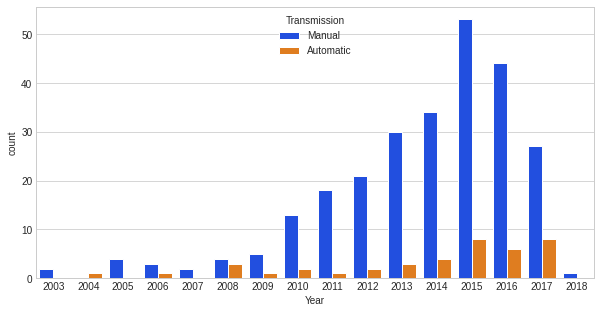

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(x="Year", hue= 'Transmission', edgecolor="1",  data=df)
plt.show()

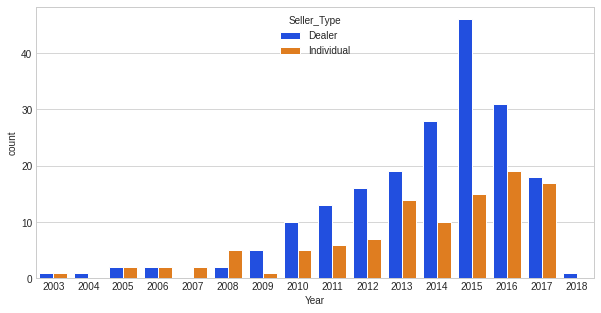

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(x="Year", hue= 'Seller_Type', edgecolor="1", data=df)
plt.show()

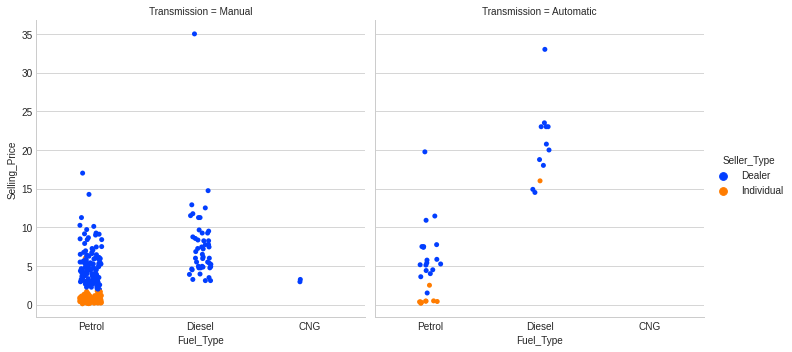

In [170]:
sns.catplot(x="Fuel_Type", y="Selling_Price", hue = 'Seller_Type', col = 'Transmission',  kind = 'strip', data = df)
plt.show()

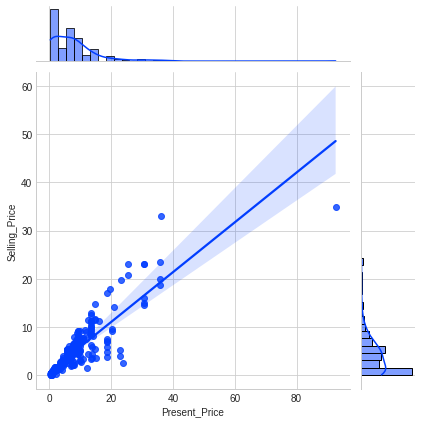

In [171]:
sns.jointplot(x="Present_Price", y="Selling_Price", kind = 'reg', data=df)
plt.show()

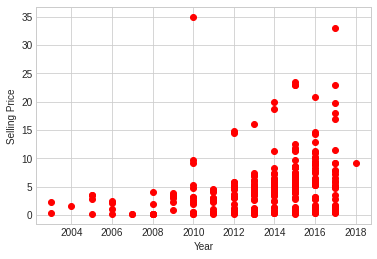

In [172]:
plt.scatter(df['Year'], df['Selling_Price'],  color='red')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

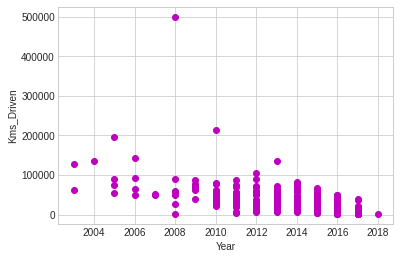

In [173]:
plt.scatter(df['Year'], df['Kms_Driven'],  color='m')
plt.xlabel("Year")
plt.ylabel("Kms_Driven")
plt.show()

In [174]:
df['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)
df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1}, inplace=True)
df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2}, inplace=True)
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
75,etios g,2015,3.95,6.80,36000,0,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0
183,Bajaj Discover 100,2013,0.27,0.47,21000,0,1,0,0
27,swift,2017,6.00,6.49,16200,0,1,0,0
200,Bajaj Pulsar 150,2006,0.10,0.75,92233,0,1,0,0
285,jazz,2016,7.40,8.50,15059,0,0,1,0
254,city,2013,5.25,9.90,54242,0,0,0,0
110,KTM RC200,2016,1.20,1.78,6000,0,1,0,0
211,elantra,2015,11.75,14.79,43535,1,0,0,0


In [175]:
y = df[['Selling_Price']]
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [177]:
print('Train')
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

print('\nTest')
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

Train
X_train:  (240, 7)
y_train:  (240, 1)

Test
X_test:  (61, 7)
y_test:  (61, 1)


In [178]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_pred = model.predict(X_test)

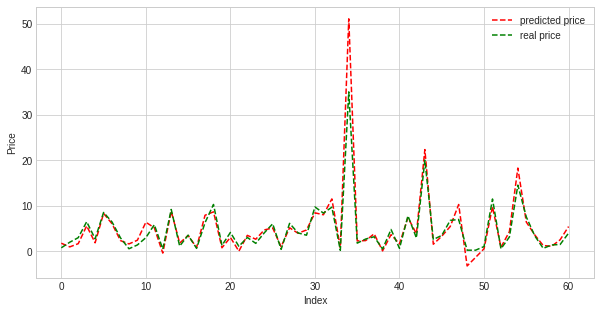

In [180]:
plt.figure(figsize=(10,5))
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['predicted price', 'real price'])
plt.ylabel('Price')
plt.xlabel('Index')

plt.show()

In [181]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8036963871417735
